<a href="https://colab.research.google.com/github/amarkotha00/Data-Science-Training/blob/main/03_Azure_Computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Visit this Link to check out different ways of Analysing pictures (Output Specific)** : https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/quickstarts-sdk/image-analysis-client-library?tabs=visual-studio&pivots=programming-language-python

In [ ]:
!pip install --upgrade azure-cognitiveservices-vision-computervision
!pip install pillow

     |████████████████████████████████| 85 kB 2.1 MB/s 
     |████████████████████████████████| 41 kB 497 kB/s 


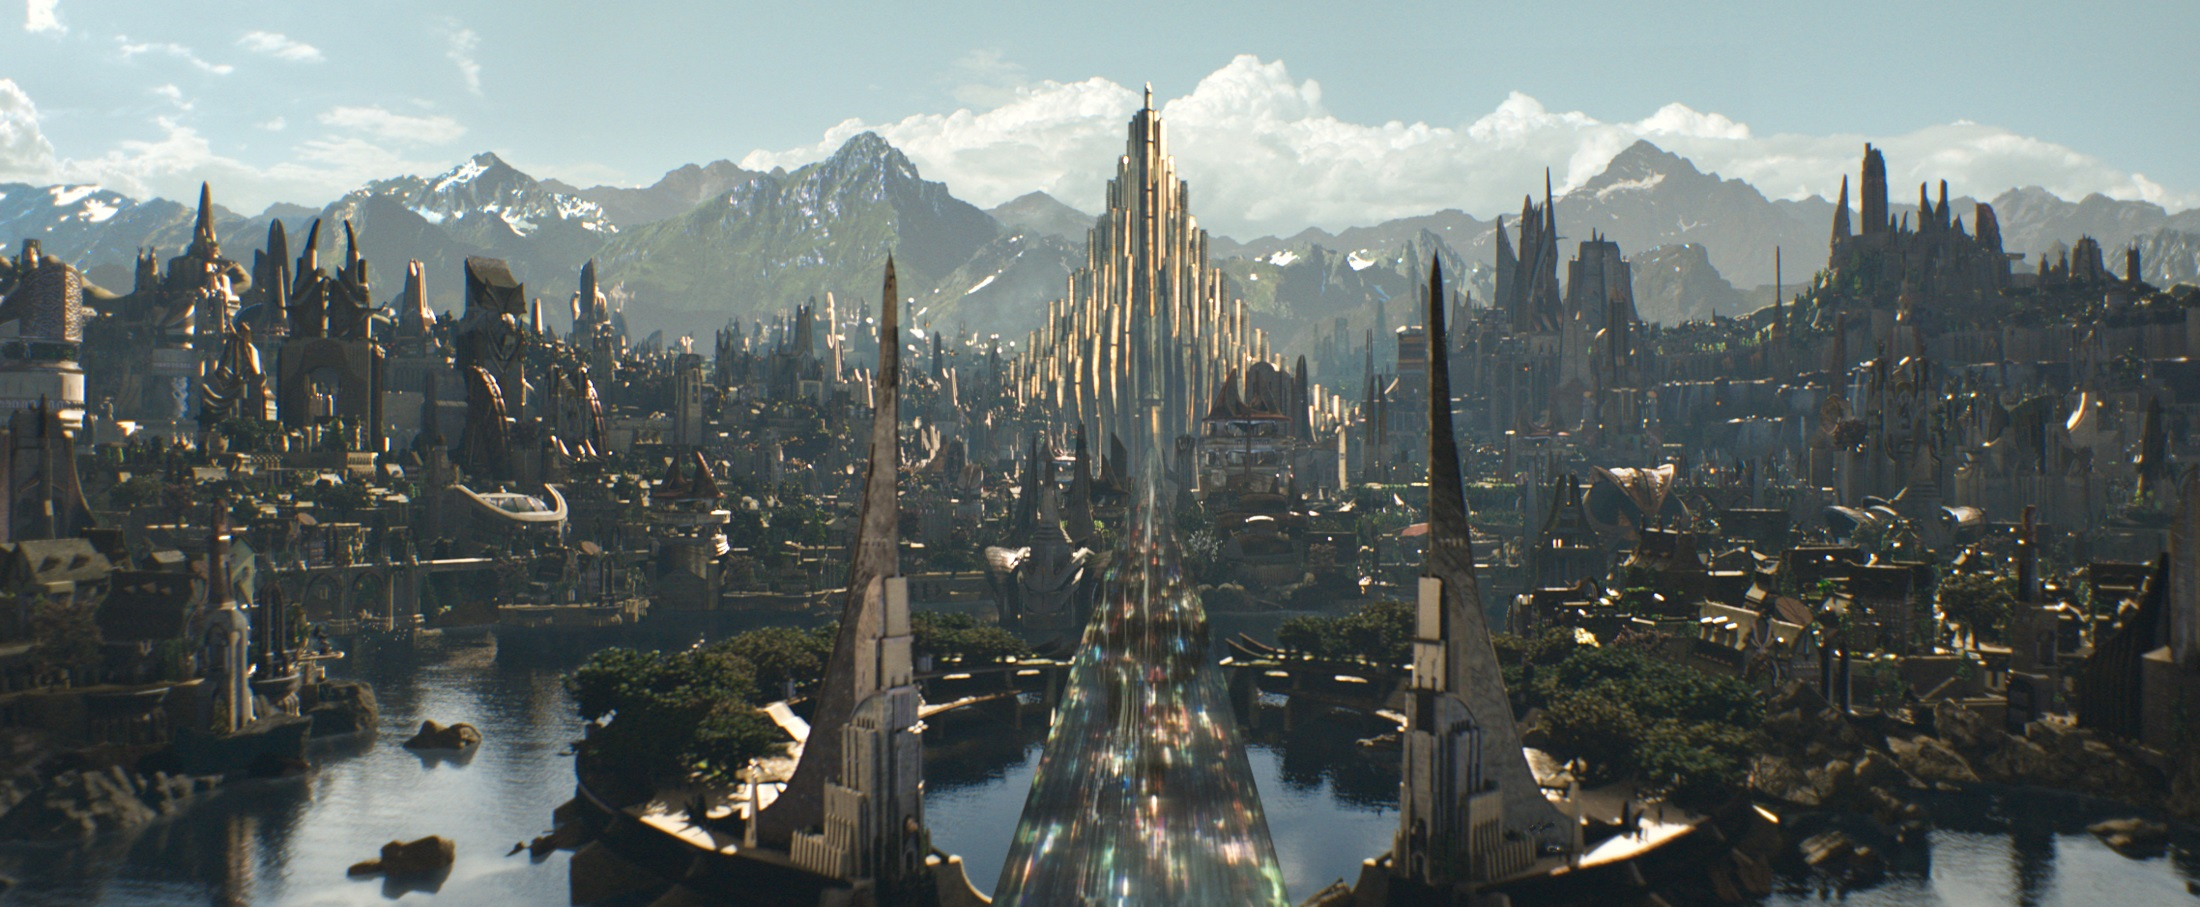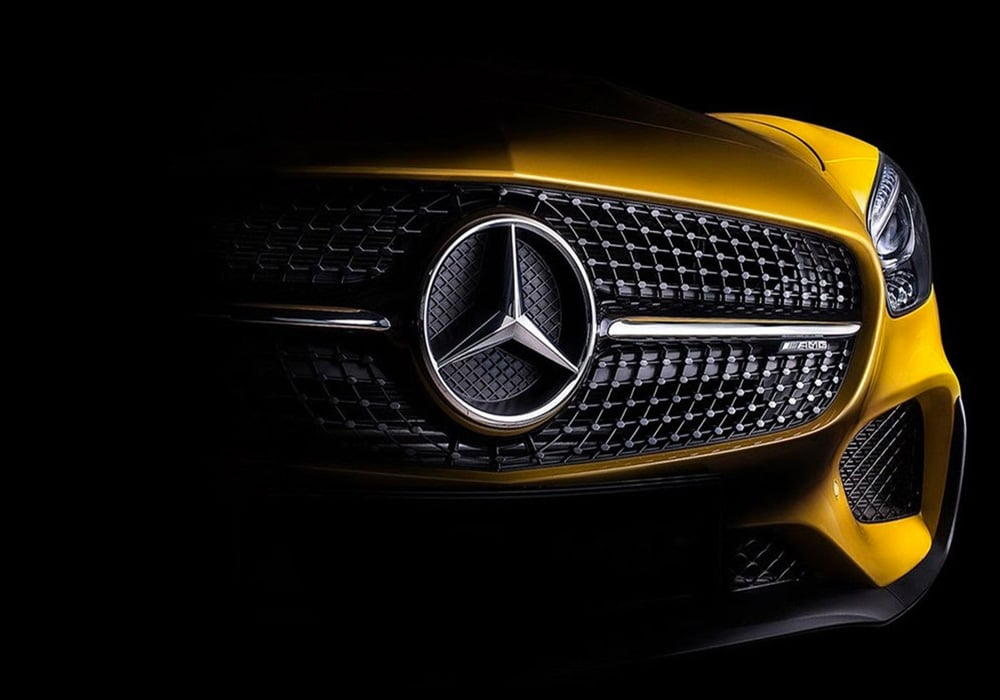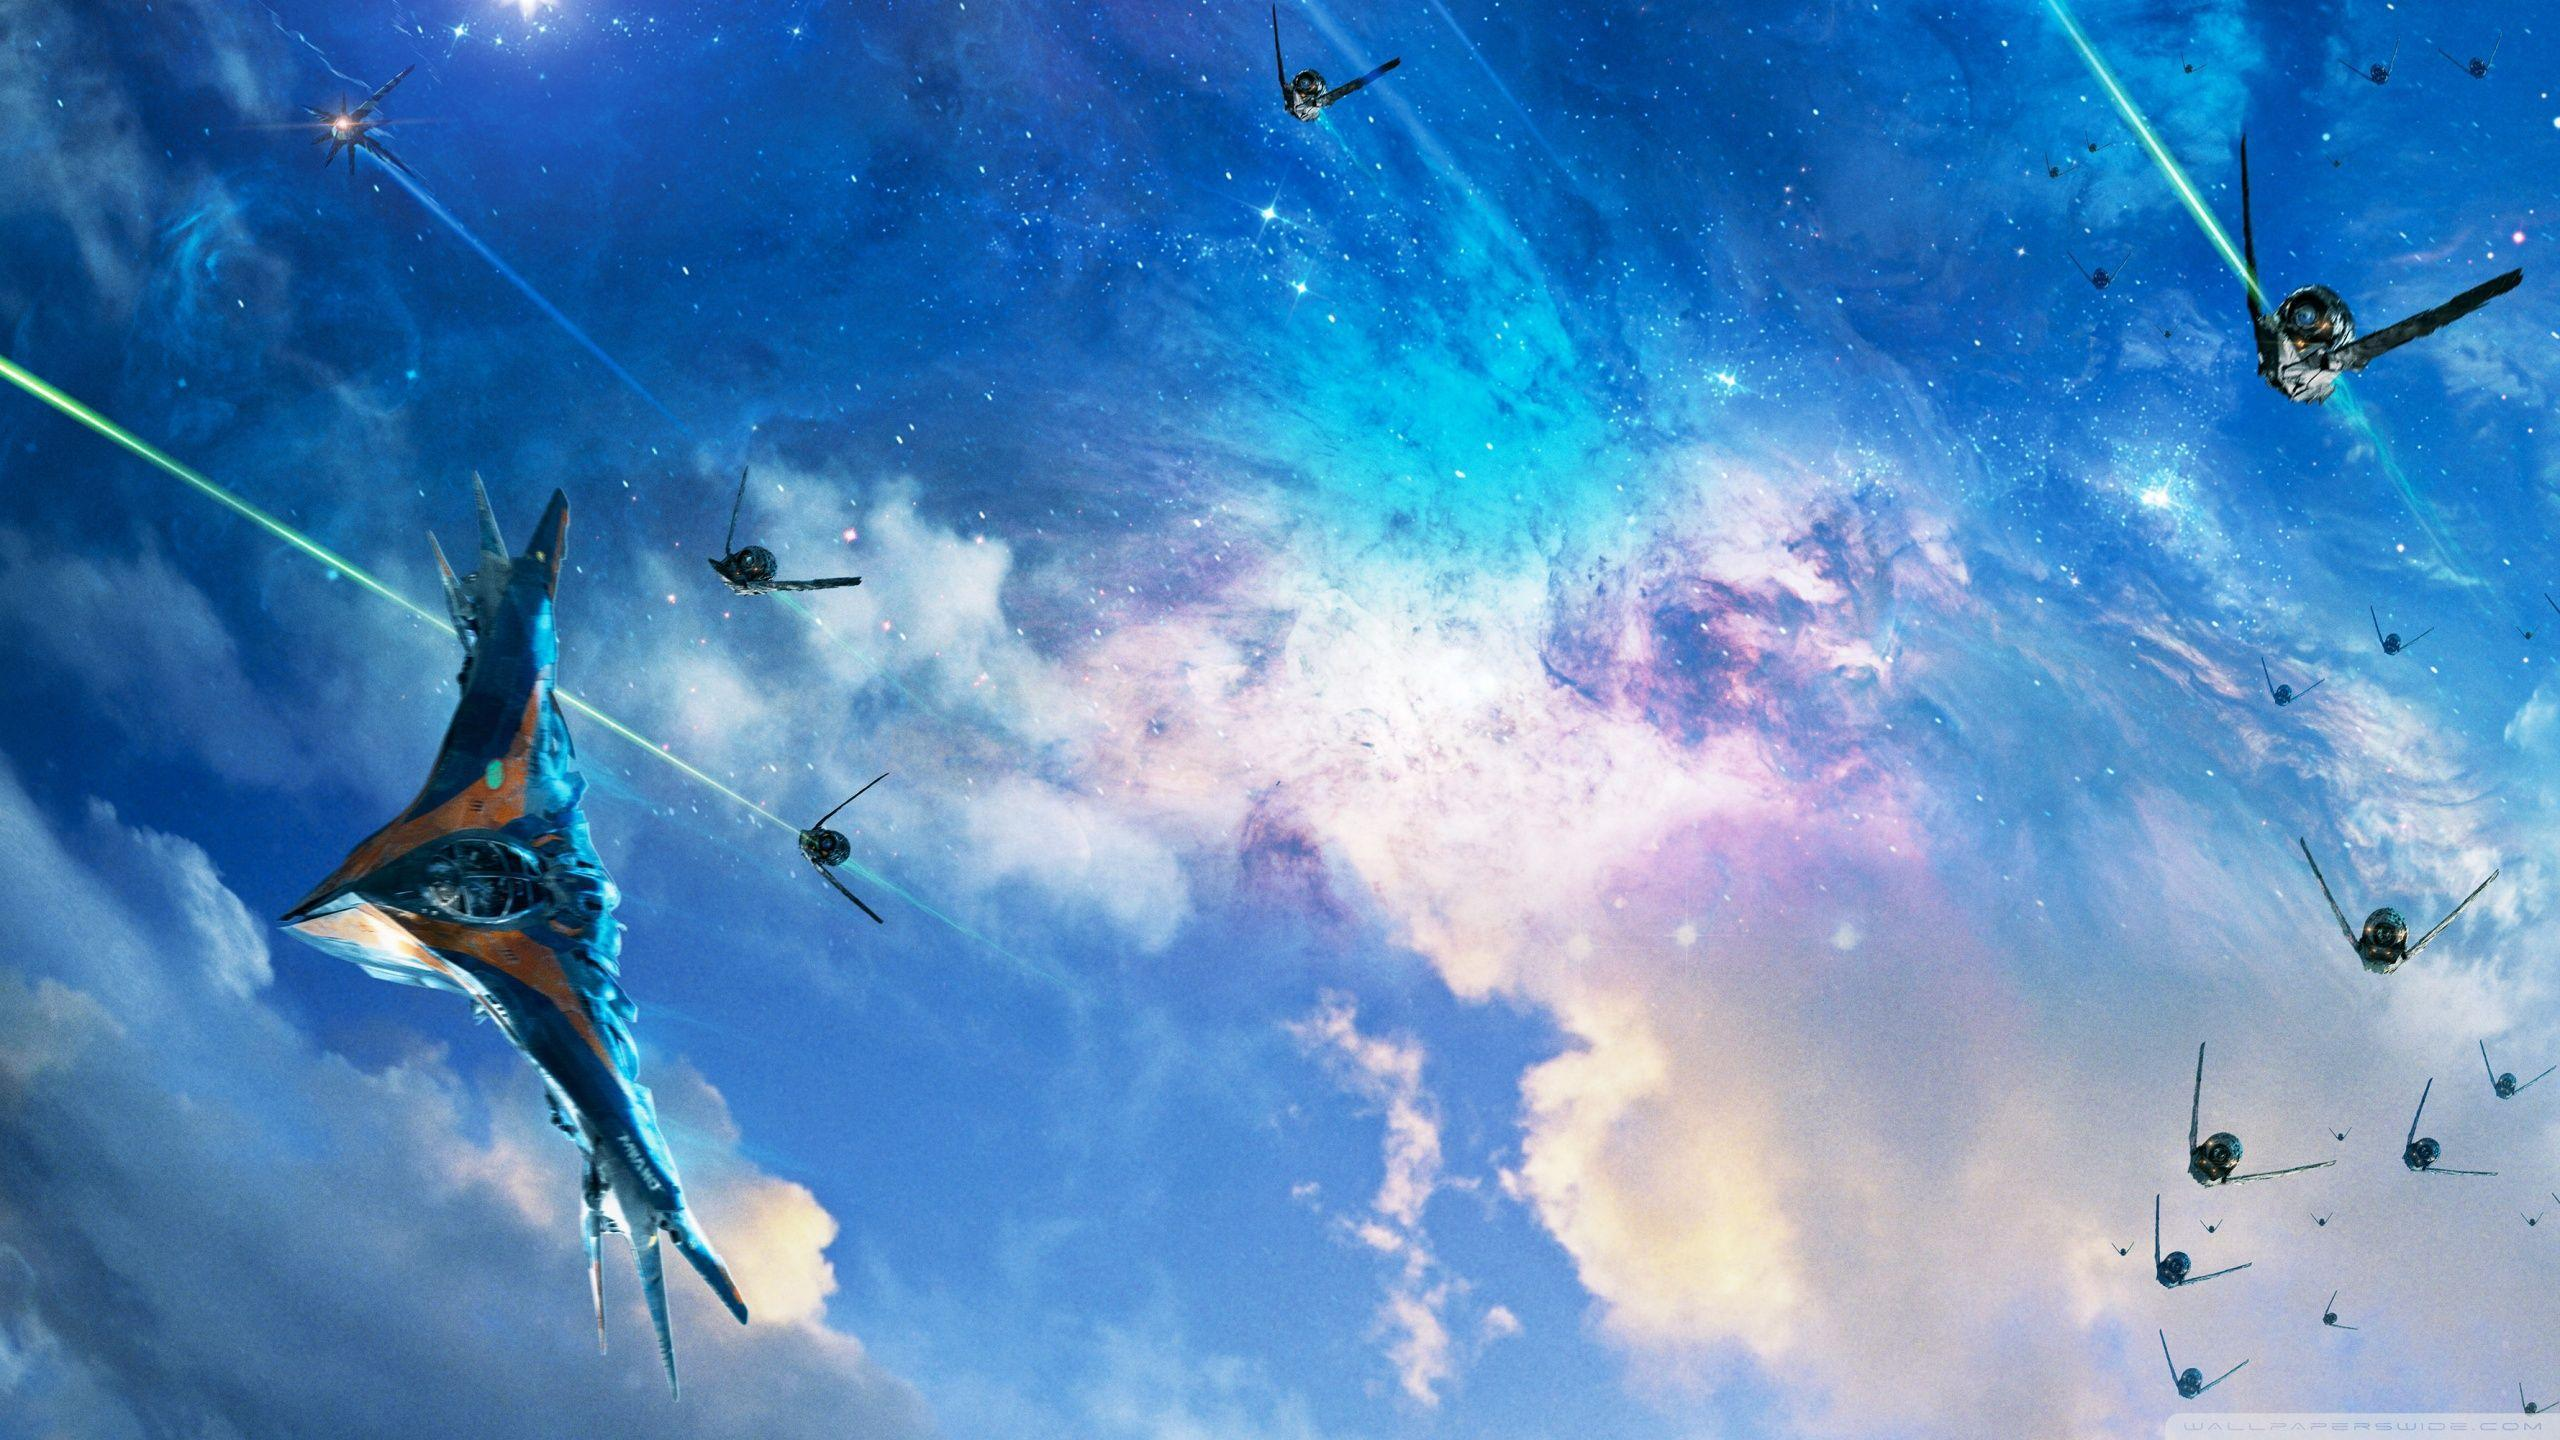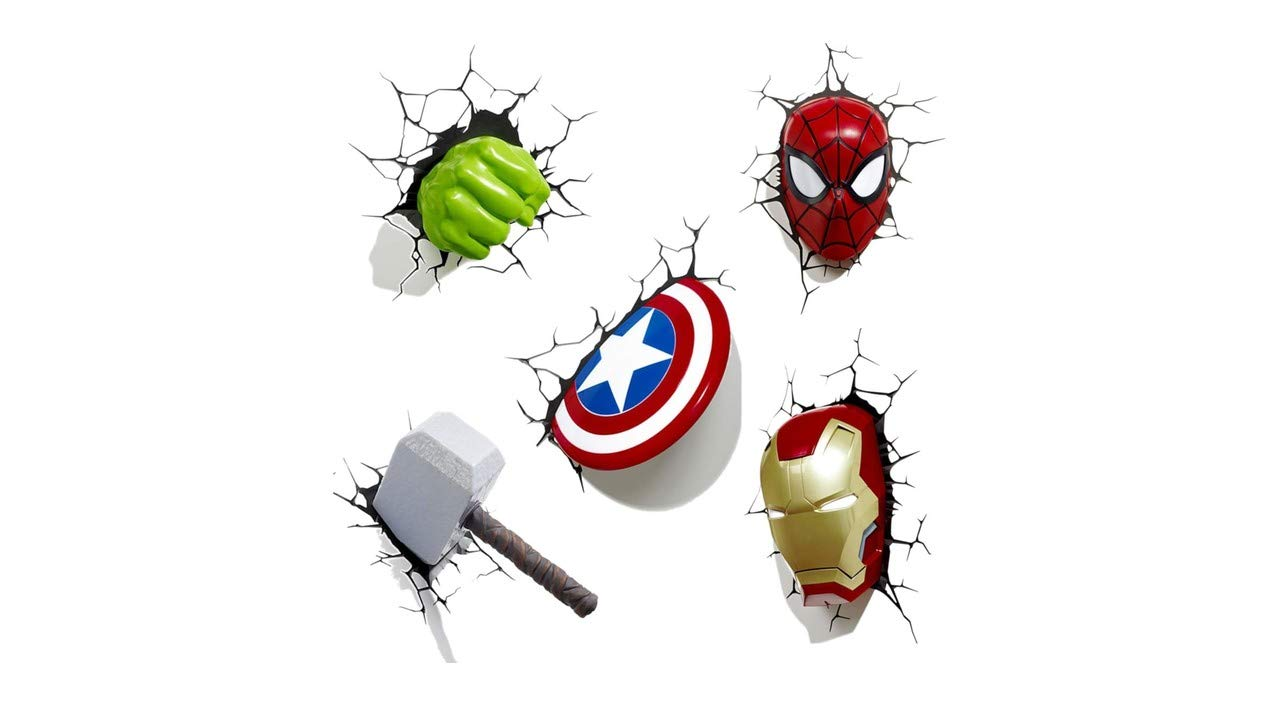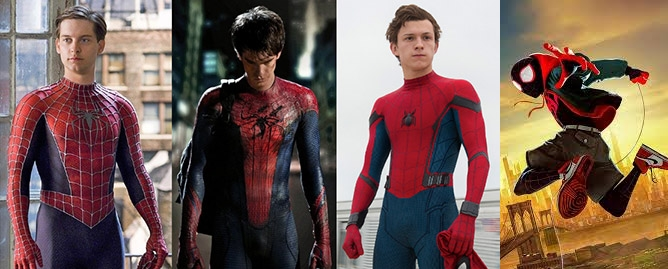

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

In [ ]:
subscription_key = "64d1155c44c040e983d009386ce4f3c0"
endpoint = "https://bully.cognitiveservices.azure.com/"

In [ ]:
#authenticate our notebook for azure computer vision
cvcredentials = CognitiveServicesCredentials(subscription_key)
computervision_client = ComputerVisionClient(endpoint, cvcredentials)

In [ ]:
baseurl = 'https://spideydump.blob.core.windows.net/imagesss/'

imgname = ['Spidey', 'weapons', 'asgard','Gogalaxy','Benz']
imgurl = {}
for i in range(5):
  fname =  baseurl + 'spd0' + str(i+1) + '.jpg'
  imgurl[imgname[i]] = fname
imgurl

{'Benz': 'https://spideydump.blob.core.windows.net/imagesss/spd05.jpg',
 'Gogalaxy': 'https://spideydump.blob.core.windows.net/imagesss/spd04.jpg',
 'Spidey': 'https://spideydump.blob.core.windows.net/imagesss/spd01.jpg',
 'asgard': 'https://spideydump.blob.core.windows.net/imagesss/spd03.jpg',
 'weapons': 'https://spideydump.blob.core.windows.net/imagesss/spd02.jpg'}

Image Desciption.

In [ ]:
for imname, imgur in imgurl.items():

  description_results = computervision_client.describe_image(imgur)
  print('Image = ' + imname)
  print()
  # Get the captions (descriptions) from the response, with confidence level
  print("Description of remote image: ")
  if (len(description_results.captions) == 0):
      print("No description detected.")
      print('****')
  else:
      for caption in description_results.captions:
          print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))
      print('****')

Image = Spidey

Description of remote image: 
'Tobey Maguire, Tom Holland are posing for a picture' with confidence 49.14%
****
Image = weapons

Description of remote image: 
'a group of bugs' with confidence 32.04%
****
Image = asgard

Description of remote image: 
'a city with tall towers and a river in the middle' with confidence 31.73%
****
Image = Gogalaxy

Description of remote image: 
'a group of people in the sky' with confidence 44.31%
****
Image = Benz

Description of remote image: 
'logo' with confidence 27.64%
****


Image Description with Tags.

In [ ]:
for imname, imgur in imgurl.items():
  description_results = computervision_client.describe_image(imgur)
  print('Image = ' + imname)
  # Call API with remote image
  tags_result_remote = computervision_client.tag_image(imgur)

  # Print results with confidence score
  print("Tags in the remote image: ")
  if (len(tags_result_remote.tags) == 0):
      print("No tags detected.")
      print('*****')
  else:
      for tag in tags_result_remote.tags:
          print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))
      print('*****')

Image = Spidey
Tags in the remote image: 
'person' with confidence 98.83%
'clothing' with confidence 95.16%
'human face' with confidence 93.89%
'superhero' with confidence 92.81%
'hero' with confidence 91.03%
'fictional character' with confidence 90.24%
'costume' with confidence 88.00%
'woman' with confidence 84.44%
*****
Image = weapons
Tags in the remote image: 
'cartoon' with confidence 86.48%
'illustration' with confidence 49.87%
'art' with confidence 46.70%
*****
Image = asgard
Tags in the remote image: 
'outdoor' with confidence 98.39%
'sky' with confidence 98.36%
'cloud' with confidence 98.31%
'mountain' with confidence 95.24%
'water' with confidence 93.05%
'skyscraper' with confidence 91.42%
'building' with confidence 89.57%
'skyline' with confidence 88.59%
'lake' with confidence 86.14%
'landscape' with confidence 79.05%
'city' with confidence 61.78%
'panorama' with confidence 54.29%
*****
Image = Gogalaxy
Tags in the remote image: 
'sky' with confidence 98.29%
'cloud' with con

Detect Faces.

In [ ]:
for imname, imgur in imgurl.items():
  description_results = computervision_client.describe_image(imgur)
  print('Image = ' + imname)
  # Get an image with faces

  remote_image_features = ["faces"]
  # Call the API with remote URL and features
  detect_faces_results_remote = computervision_client.analyze_image(imgur, remote_image_features)

  # Print the results with gender, age, and bounding box
  print("Faces in the remote image: ")
  if (len(detect_faces_results_remote.faces) == 0):
      print("No faces detected.")
      print('*****')
  else:
      for face in detect_faces_results_remote.faces:
          print("'{}' of age {} at location {}, {}, {}, {}".format(face.gender, face.age, \
          face.face_rectangle.left, face.face_rectangle.top, \
          face.face_rectangle.left + face.face_rectangle.width, \
          face.face_rectangle.top + face.face_rectangle.height))
      print('*****')

Image = Spidey
Faces in the remote image: 
'Male' of age 30 at location 55, 29, 95, 69
'Male' of age 22 at location 399, 27, 437, 65
*****
Image = weapons
Faces in the remote image: 
No faces detected.
*****
Image = asgard
Faces in the remote image: 
No faces detected.
*****
Image = Gogalaxy
Faces in the remote image: 
No faces detected.
*****
Image = Benz
Faces in the remote image: 
No faces detected.
*****


Detect the Celebrity.

In [ ]:
for imname, imgur in imgurl.items():
  description_results = computervision_client.describe_image(imgur)
  # Call API with content type (celebrities) and URL
  detect_domain_results_celebs_remote = computervision_client.analyze_image_by_domain("celebrities", imgur)

  # Print detection results with name
  print("Celebrities in the remote image:")
  if len(detect_domain_results_celebs_remote.result["celebrities"]) == 0:
      print("No celebrities detected.")
      print('*****')
  else:
      for celeb in detect_domain_results_celebs_remote.result["celebrities"]:
          print(celeb["name"])
      print('*****')

Celebrities in the remote image:
Tobey Maguire
Tom Holland
*****
Celebrities in the remote image:
No celebrities detected.
*****
Celebrities in the remote image:
No celebrities detected.
*****
Celebrities in the remote image:
No celebrities detected.
*****
Celebrities in the remote image:
No celebrities detected.
*****


Detect Brands.

In [ ]:
for imname, imgur in imgurl.items():
  description_results = computervision_client.describe_image(imgur)
  print('Image = ' + imname)
  remote_image_features = ["brands"]
  # Call API with URL and features
  detect_brands_results_remote = computervision_client.analyze_image(imgur, remote_image_features)

  print("Detecting brands in remote image: ")
  if len(detect_brands_results_remote.brands) == 0:
      print("No brands detected.")
      print('*****')
  else:
      for brand in detect_brands_results_remote.brands:
          print("'{}' brand detected with confidence {:.1f}% at location {}, {}, {}, {}".format( \
          brand.name, brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
          brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))
      print('*****')

Image = Spidey
Detecting brands in remote image: 
No brands detected.
*****
Image = weapons
Detecting brands in remote image: 
No brands detected.
*****
Image = asgard
Detecting brands in remote image: 
No brands detected.
*****
Image = Gogalaxy
Detecting brands in remote image: 
No brands detected.
*****
Image = Benz
Detecting brands in remote image: 
'Mercedes-Benz' brand detected with confidence 78.0% at location 417, 603, 216, 446
*****
